In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler 
#from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
#from sklearn import preprocessing # how to import preprocessing
#import sklearn.preprocessing
from sklearn.model_selection import train_test_split as split

In [2]:
data=pd.read_csv('AAPL.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
df = data.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.76)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.76):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(1528, 1)
(483, 1)


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))

In [6]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.02395029],
       [0.02650731],
       [0.03181801],
       ...,
       [0.93399211],
       [0.93723171],
       [0.90847989]])

In [7]:
x_train= []
y_train= []

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

In [8]:
x_train.shape

(1428, 100, 1)

In [9]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [11]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
45/45 [==============================] - 40s 535ms/step - loss: 0.0434
Epoch 2/50
45/45 [==============================] - 22s 493ms/step - loss: 0.0100
Epoch 3/50
45/45 [==============================] - 22s 494ms/step - loss: 0.0079
Epoch 4/50
45/45 [==============================] - 23s 504ms/step - loss: 0.0075
Epoch 5/50
45/45 [==============================] - 23s 510ms/step - loss: 0.0073
Epoch 6/50
45/45 [==============================] - 23s 511ms/step - loss: 0.0066
Epoch 7/50
45/45 [==============================] - 23s 503ms/step - loss: 0.0060
Epoch 8/50
45/45 [==============================] - 22s 495ms/step - loss: 0.0061
Epoch 9/50
45/45 [==============================] - 23s 500ms/step - loss: 0.0059
Epoch 10/50
45/45 [==============================] - 23s 506ms/step - loss: 0.0055
Epoch 11/50
45/45 [==============================] - 23s 503ms/step - loss: 0.0054
Epoch 12/50
45/45 [==============================] - 39s 877ms/step - loss: 0.0054
Epoch 13/50
4

In [12]:
past_100_days = data_train.tail(100)
final_df = past_100_days.append(data_test , ignore_index=True)

<ipython-input-12-ed909b8ec9e4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test , ignore_index=True)


In [13]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13205654],
       [0.12770371],
       [0.11009177],
       [0.12931092],
       [0.12502512],
       [0.11692221],
       [0.10774793],
       [0.1184625 ],
       [0.11035959],
       [0.11076137],
       [0.09294854],
       [0.07500166],
       [0.06495679],
       [0.0559834 ],
       [0.07332752],
       [0.08062677],
       [0.07426504],
       [0.07989014],
       [0.07781422],
       [0.08230091],
       [0.07560433],
       [0.08839482],
       [0.08779215],
       [0.09140826],
       [0.09181004],
       [0.09616288],
       [0.09247974],
       [0.09910938],
       [0.1184625 ],
       [0.12241345],
       [0.11765884],
       [0.09234578],
       [0.09415388],
       [0.09361814],
       [0.09984601],
       [0.09522536],
       [0.10192194],
       [0.13969064],
       [0.16426707],
       [0.17980308],
       [0.16540547],
       [0.17357531],
       [0.20297328],
       [0.2146923 ],
       [0.21844237],
       [0.22801852],
       [0.22560775],
       [0.217

In [14]:
input_data.shape

(583, 1)

In [15]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [16]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(483, 100, 1)
(483,)


In [17]:
#Making predictions
y_predicted = model.predict(x_test)
y_predicted.shape

16/16 [==============================] - 54s 171ms/step


(483, 1)

In [18]:
scaler.scale_

array([0.00669658])

In [19]:
scale_factor = 1/0.00669658
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

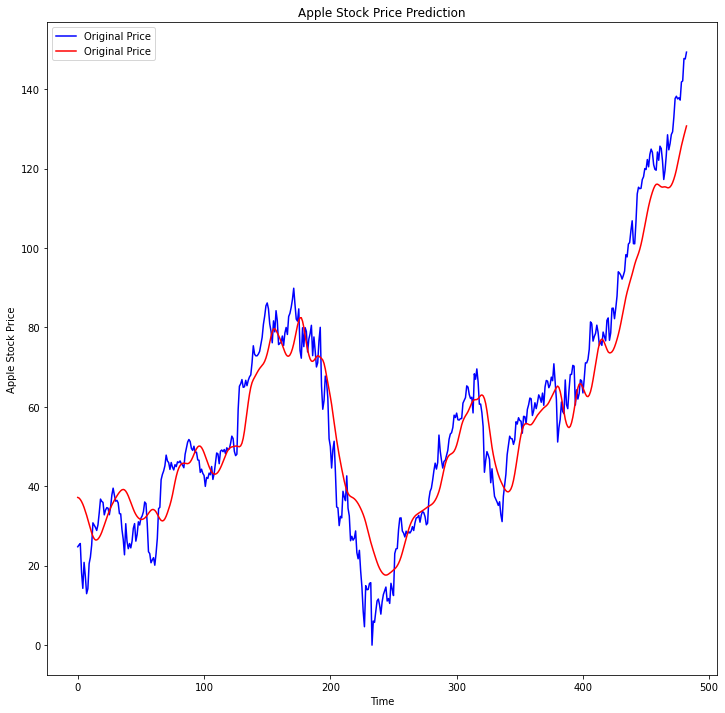

In [20]:
plt.figure(figsize=(12,12))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Original Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [21]:
#RMSE
from keras import backend as k
np.mean(k.sqrt(k.mean(k.square(y_predicted - y_test), axis=-1)))

37.610773864721985